# Test the fuck out of Customized SHAP code

In [1]:
import argparse
import os
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch.utils.data import DataLoader
from plotter import TensorboardPlotter
from dataset import AdversarialDataset
from model import *

In [21]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device : ", device)

# Load model
model = AdversarialMTL(hidden_unit=128)
model.to(device)
model.load_state_dict(torch.load('./model/ADMTL/smote_alp005.pth', map_location=device))
print("Model loaded")

Device :  cpu
Model loaded


In [22]:
data = AdversarialDataset(mode='test')
print("Dataset created")

print(type(data))
data_feature = data.features
print(type(data))
data_feature = torch.from_numpy(data_feature).float().to(device)
print(type(data_feature))
print(data_feature.shape)
data_feature.to(device)

Dataset created
<class 'dataset.AdversarialDataset'>
<class 'dataset.AdversarialDataset'>
<class 'torch.Tensor'>
torch.Size([572, 16])


tensor([[ 1.0000,  0.2990, -0.3725,  ..., -0.7328, -0.2247, -0.8231],
        [ 0.0000, -1.4155, -0.4143,  ...,  0.3556, -0.4358, -0.0873],
        [ 0.0000, -0.8492,  0.0601,  ...,  0.2026, -0.3302, -0.2406],
        ...,
        [ 1.0000, -2.0932,  0.1697,  ..., -0.4363, -0.5665, -0.2020],
        [ 0.0000, -0.5107,  7.1632,  ...,  0.6100,  3.0644,  2.4509],
        [ 0.0000, -1.4178, -0.3725,  ..., -0.7709,  0.6007, -0.2487]])

In [23]:
out1, out2, ad, _ = model(data_feature)
outputs = torch.cat((out1, out2), dim=1)
outputs.to(device)

tensor([[1.8708e-01, 1.0006e-02],
        [1.0537e-03, 1.1945e-02],
        [8.6336e-02, 5.8044e-04],
        ...,
        [4.7337e-02, 2.5120e-04],
        [4.3970e-07, 1.0000e+00],
        [4.6932e-03, 3.8647e-01]], grad_fn=<CatBackward0>)

In [24]:
print(ad.shape)
outputs_ad = torch.cat((out1,out2,ad),dim=1)
print(outputs_ad.shape)

torch.Size([572, 3])
torch.Size([572, 5])


In [25]:
out1.device

device(type='cpu')

In [26]:
outputs.device

device(type='cpu')

In [27]:
import SHAP

In [28]:

explainer = SHAP.DeepExplainer(model, data_feature, 'ADMTL')

In [29]:
shape_values = explainer.shap_values(data_feature)

In [30]:
print(len(shape_values))

5


In [31]:
print(shape_values[0].shape)

(572, 16)


In [32]:
print(shape_values[1].shape)

(572, 16)


In [33]:
# '진단시점나이'를 age 로 변환
feature_names = data.feature_names

for name in feature_names:
    if name == '진단시점나이':
        feature_names[feature_names.index(name)] = 'age'
print(feature_names)

['Gender', 'age', 'CMV IgM[Serum]', 'CMV IgG[Serum]', 'HSV IgM[Serum]', 'VZV IgM[Serum]', 'VZV IgG[Serum]', 'WBC COUNT[Whole blood]', 'Lymphocyte(#)[Whole blood]', 'Lymphocyte(%)[Whole blood]', 'Monocyte(#)[Whole blood]', 'Monocyte(%)[Whole blood]', 'Neutrophil(#)[Whole blood]', 'Neutrophil(%)[Whole blood]', 'ESR[Whole blood]', 'CRP[Serum]']


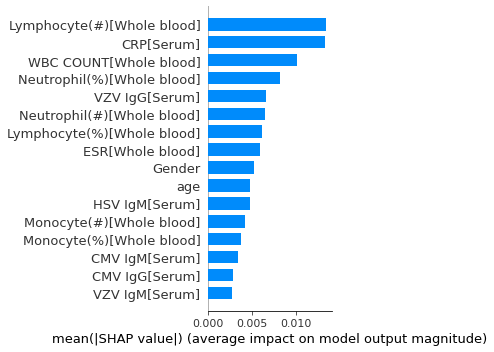

In [34]:
SHAP.summary_plot(shape_values[0], data_feature, plot_type="bar", feature_names=feature_names, plot_size=(5,5))

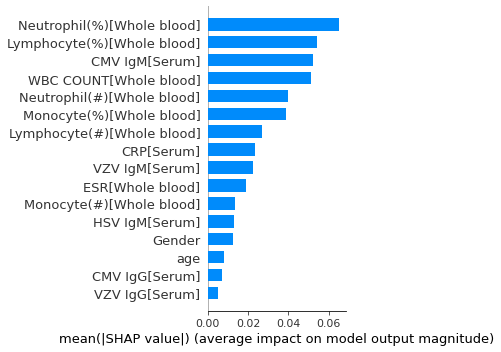

In [35]:
SHAP.summary_plot(shape_values[1], data_feature, plot_type="bar", feature_names=feature_names, plot_size=(5,5))

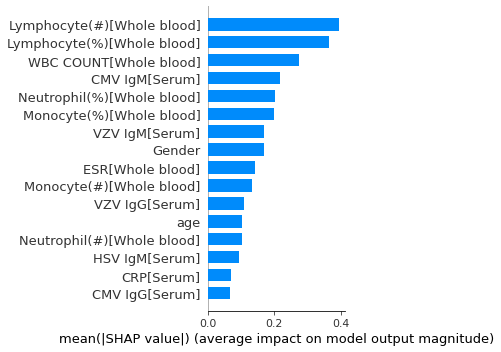

In [36]:
SHAP.summary_plot(shape_values[2], data_feature, plot_type="bar", feature_names=feature_names, plot_size=(5,5))

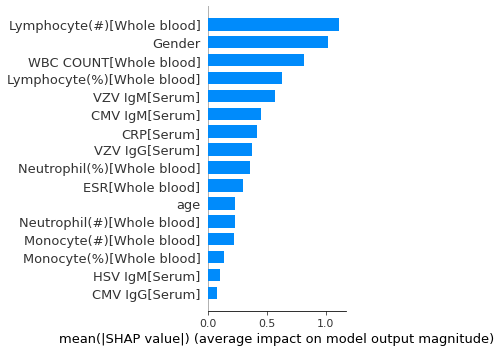

In [37]:
SHAP.summary_plot(shape_values[3], data_feature, plot_type="bar", feature_names=feature_names, plot_size=(5,5))

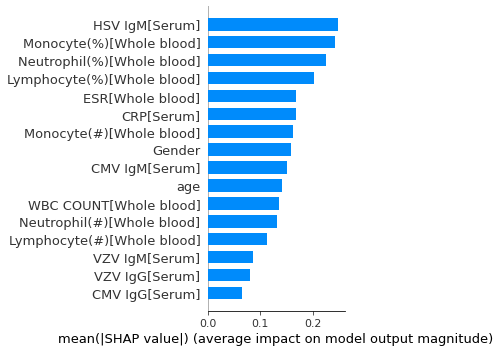

In [38]:
SHAP.summary_plot(shape_values[4], data_feature, plot_type="bar", feature_names=feature_names, plot_size=(5,5))